<ErrorbarContainer object of 3 artists>

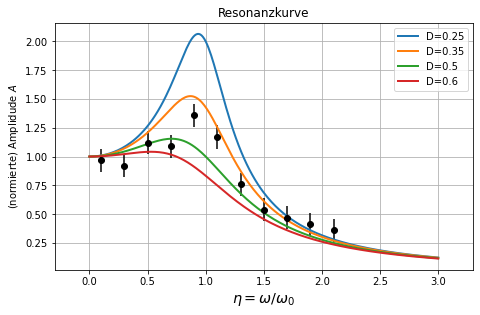

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def resonanz(eta, D, A=1.):
    return A/np.sqrt((1 - eta*eta)**2 + (2.*eta*D)**2)


# Ein numpy-array, das die Stützstellen enthält
etamin, etamax = 0., 3.
npoints = 256
eta = np.linspace(etamin, etamax, npoints, endpoint=True)

fig = plt.figure(figsize=(7.5, 10))
ax = fig.add_subplot(2, 1, 1)
# Plots der Funktion generieren
for D in (0.25, 0.35, 0.5, 0.6):
    ax.plot(eta, resonanz(eta, D), linewidth=2, label="D="+str(D))

# Plot noch etwas polieren
ax.set_title('Resonanzkurve')
ax.set_xlabel('$\eta=\omega/\omega_0$', size='x-large')
ax.set_ylabel('(normierte) Amplidude $A$')

ax.set_xlim(etamin-0.1*(etamax-etamin), etamax+0.1*(etamax-etamin))
ax.legend(loc='upper right')
ax.grid(True)

# Daten einlesen und einzeichnen
etam = np.array([0.10, 0.30, 0.50, 0.70, 0.90, 1.10, 1.30, 1.50, 1.70, 1.90, 2.10])
Am = np.array([0.97, 0.92, 1.12, 1.09, 1.36, 1.17, 0.76, 0.54, 0.47, 0.41, 0.36])
etaerr = 0.
Aerr = 0.1
ax.errorbar(etam, Am, xerr=etaerr, yerr=Aerr, fmt='ko')



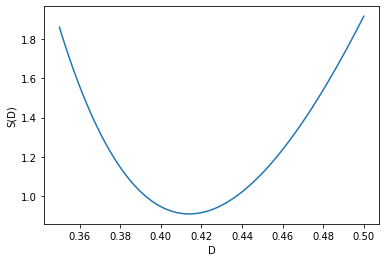

Für D_min = 0.41363636363636364 ist S(D) minimal mit S(D_min) = 0.9112710346151063


In [2]:
DValues = np.linspace(0.35, 0.5, 100)
SValues = [np.sum((Am - np.array([resonanz(eta, D) for eta in etam]))**2 / np.var(Am)) for D in DValues]

plt.plot(DValues, SValues)
plt.xlabel('D')
plt.ylabel('S(D)')
plt.show()

SMin = np.min(SValues)
DMin = DValues[np.where(SMin == SValues)[0][0]]
print('Für D_min = ' + str(DMin) + ' ist S(D) minimal mit S(D_min) = ' + str(SMin))